In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df_majority = df[df['Exited'] ==0]
df_minority = df[df['Exited'] ==1]
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, n_samples= len(df_minority), replace=False)
df = pd.concat([df_minority, df_majority_downsampled])

In [10]:
df = df.sample(frac = 1).reset_index(drop = True)

In [11]:
df.Exited.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,820,15747807,Gallagher,720,France,Female,43,6,137824.03,2,1,0,172557.77,0
1,6114,15585867,Rutledge,596,Spain,Male,36,2,0.00,2,0,1,125557.95,0
2,6443,15719212,T'ien,491,France,Male,33,5,83134.30,1,1,0,187946.55,0
3,3260,15778830,Dellucci,841,France,Male,31,2,0.00,2,1,0,173240.52,0
4,198,15777892,Samsonova,721,Germany,Male,37,3,107720.64,1,1,1,158591.12,0


In [13]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,720,France,Female,43,6,137824.03,2,1,0,172557.77,0
1,596,Spain,Male,36,2,0.00,2,0,1,125557.95,0
2,491,France,Male,33,5,83134.30,1,1,0,187946.55,0
3,841,France,Male,31,2,0.00,2,1,0,173240.52,0
4,721,Germany,Male,37,3,107720.64,1,1,1,158591.12,0


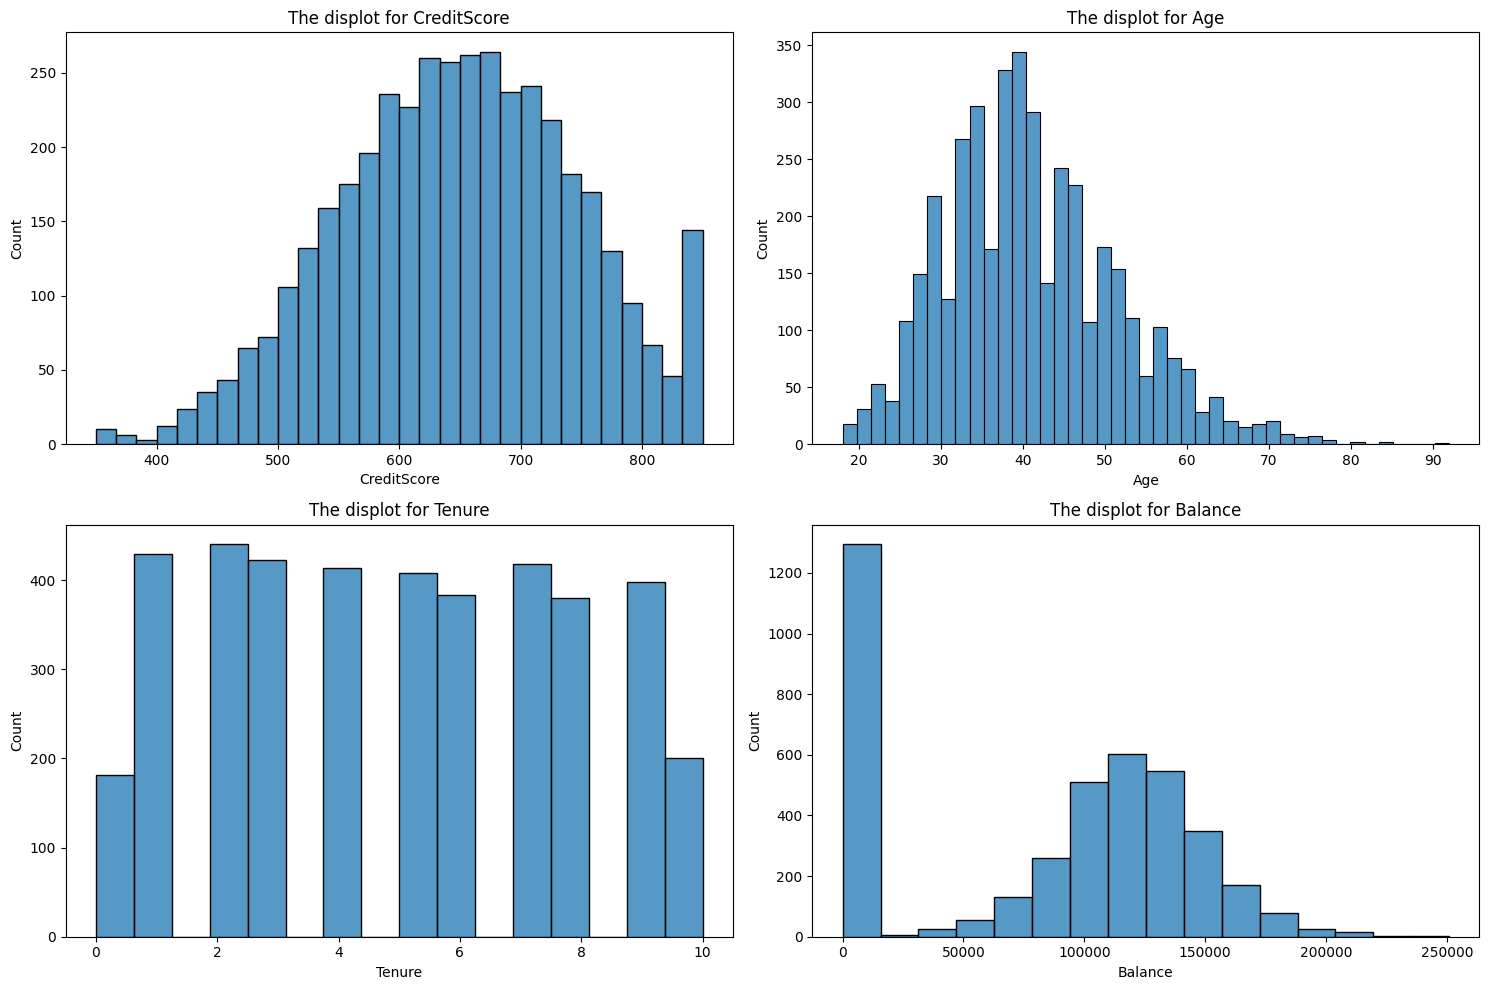

In [15]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['CreditScore', 'Age', 'Tenure', 'Balance']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column])
    plt.title(f"The displot for {column}")

plt.tight_layout()


In [16]:
df.Exited.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [17]:
df.Geography.value_counts()

Geography
France     1859
Germany    1280
Spain       935
Name: count, dtype: int64

In [18]:
df.Gender.value_counts()

Gender
Male      2084
Female    1990
Name: count, dtype: int64

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,720,France,Female,43,6,137824.03,2,1,0,172557.77,0
1,596,Spain,Male,36,2,0.00,2,0,1,125557.95,0
2,491,France,Male,33,5,83134.30,1,1,0,187946.55,0
3,841,France,Male,31,2,0.00,2,1,0,173240.52,0
4,721,Germany,Male,37,3,107720.64,1,1,1,158591.12,0


In [20]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1706,516,France,Female,46,1,104947.72,1,1,0,115789.25,1


In [21]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [22]:
num_features = X.select_dtypes(exclude='object').columns
num_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,720,France,Female,43,6,137824.03,2,1,0,172557.77,0
1,596,Spain,Male,36,2,0.00,2,0,1,125557.95,0
2,491,France,Male,33,5,83134.30,1,1,0,187946.55,0
3,841,France,Male,31,2,0.00,2,1,0,173240.52,0
4,721,Germany,Male,37,3,107720.64,1,1,1,158591.12,0


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
transformer = ColumnTransformer([
    ('trf1' , OneHotEncoder(drop='first'), ['Geography', 'Gender']),
    ('trf2', StandardScaler(), num_features)

], remainder= 'passthrough')

In [25]:
X = transformer.fit_transform(X)

In [26]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.722105,0.176557,0.365171,0.903610,0.719876,0.641594,-0.927968,1.246832
1,0.0,1.0,1.0,-0.544883,-0.483517,-1.013292,-1.341417,0.719876,-1.558619,1.077624,0.431106
2,0.0,0.0,1.0,-1.617736,-0.766406,0.020555,0.012764,-0.765073,0.641594,-0.927968,1.513918
3,0.0,0.0,1.0,1.958439,-0.954999,-1.013292,-1.341417,0.719876,0.641594,-0.927968,1.258681
4,1.0,0.0,1.0,0.732322,-0.389221,-0.668676,0.413253,-0.765073,0.641594,1.077624,1.004427
...,...,...,...,...,...,...,...,...,...,...,...
4069,0.0,0.0,1.0,-1.014895,-1.803665,0.365171,1.173247,-0.765073,0.641594,1.077624,-0.850394
4070,0.0,1.0,0.0,0.579057,0.459446,-1.013292,0.738054,0.719876,0.641594,-0.927968,0.858042
4071,0.0,0.0,1.0,1.467993,-0.860702,-1.013292,-1.341417,0.719876,0.641594,-0.927968,1.615816
4072,0.0,1.0,1.0,0.691452,-0.766406,-1.357907,0.272941,-0.765073,-1.558619,-0.927968,1.627091


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [28]:
X_train.shape

(2851, 11)

In [46]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.optimizers import Adam
import datetime

In [30]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
callbacks = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001, 
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [34]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, callbacks= callbacks)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6216 - loss: 0.6572 - val_accuracy: 0.7145 - val_loss: 0.5668
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7282 - loss: 0.5625 - val_accuracy: 0.7285 - val_loss: 0.5304
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7401 - loss: 0.5268 - val_accuracy: 0.7461 - val_loss: 0.5141
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7569 - loss: 0.4916 - val_accuracy: 0.7478 - val_loss: 0.4929
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7685 - loss: 0.4965 - val_accuracy: 0.7671 - val_loss: 0.4775
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7730 - loss: 0.4694 - val_accuracy: 0.7566 - val_loss: 0.4706
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7747 - loss: 0.4608 - val_accuracy: 0.7583 - val_loss: 0.4659
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7743 - loss: 0.4684 - val_accuracy: 0.7583 - val_loss:

In [35]:
y_prob = model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [36]:
y_pred = np.where(y_prob > 0.5, 1, 0)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.7628781684382666


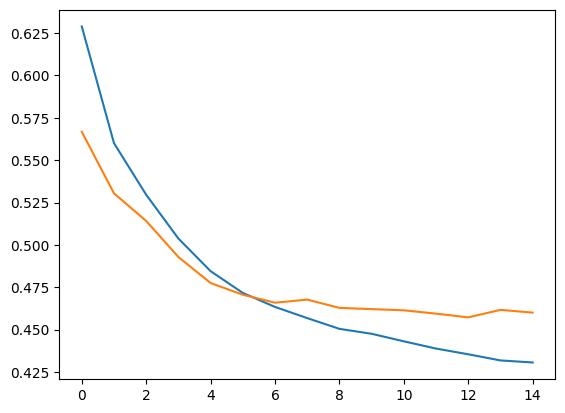

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

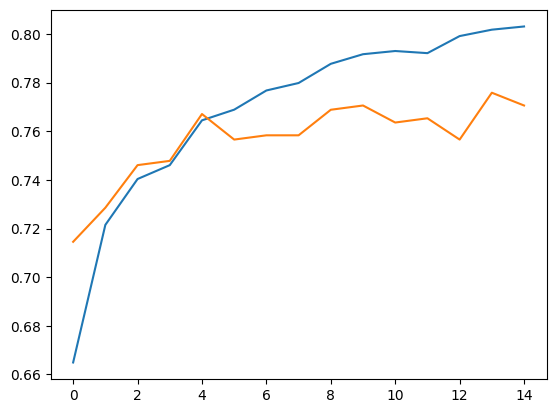

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [40]:
with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

In [41]:
model.save('model.h5')

In [42]:
import keras_tuner as kt

In [50]:
X_train.shape

(2851, 11)

In [70]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layer', min_value=1, max_value=10, step=1)):
        if i == 0:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                activation=hp.Choice('activation' + str(i), values=['sigmoid', 'relu', 'tanh']),
                input_shape=(11,)
            ))
            # model.add(Dropout(hp.Choice('dropout' +str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
        else:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                activation=hp.Choice('activation' + str(i), values=['sigmoid', 'relu', 'tanh'])
            ))
            # model.add(Dropout(hp.Choice('dropout' +str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [71]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=3)

In [72]:
tuner.search(X_train, Y_train, epochs = 10, validation_split = 0.2)

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.5096322298049927

Best val_accuracy So Far: 0.7285463809967041
Total elapsed time: 00h 00m 14s


In [64]:
tuner.get_best_hyperparameters()[0].values

{'num_layer': 7,
 'units0': 80,
 'activation0': 'relu',
 'dropout0': 0.9,
 'optimizer': 'adam',
 'units1': 32,
 'activation1': 'tanh',
 'dropout1': 0.1,
 'units2': 48,
 'activation2': 'relu',
 'dropout2': 0.5,
 'units3': 32,
 'activation3': 'tanh',
 'dropout3': 0.1,
 'units4': 32,
 'activation4': 'sigmoid',
 'dropout4': 0.3,
 'units5': 48,
 'activation5': 'tanh',
 'dropout5': 0.2,
 'units6': 72,
 'activation6': 'relu',
 'dropout6': 0.6,
 'units7': 32,
 'activation7': 'tanh',
 'dropout7': 0.1}

In [73]:
model1 = tuner.get_best_models(num_models=1)[0]

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [74]:
model1.fit(X_train, Y_train, epochs=100, initial_epoch=6, validation_split=0.2)

Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5243 - loss: 0.6930 - val_accuracy: 0.5096 - val_loss: 0.6926
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5305 - loss: 0.6927 - val_accuracy: 0.5096 - val_loss: 0.6921
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5188 - loss: 0.6922 - val_accuracy: 0.5096 - val_loss: 0.6905
Epoch 10/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5528 - loss: 0.6897 - val_accuracy: 0.7426 - val_loss: 0.6857
Epoch 11/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5995 - loss: 0.6825 - val_accuracy: 0.7513 - val_loss: 0.6711
Epoch 12/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7576 - loss: 0.6645 - val_accuracy: 0.7513 - val_loss: 0.6429
Epoch 13/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7706 - loss: 0.6282 - val_accuracy: 0.7443 - val_loss: 0.6097
Epoch 14/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7669 - loss: 0.5932 - val_accuracy: 0.749

In [75]:
loss, accuracy = model.evaluate(X_test, Y_test)
accuracy

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.5542


0.7432543039321899